In [1]:
import pandas as pd
import numpy as np
import glob  
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt               # Visualização de dados
import matplotlib
plt.style.use('fivethirtyeight') 
#import squarify
from datetime import datetime
from folium import Map
from folium.plugins import HeatMap

In [2]:
# FUNÇÃO PARA IMPORTAR DATASET

dir_path = "data/"

def importaData(files):
    
    data = dir_path + files
    allFiles = glob.glob('data/*.csv')
    list_ = []
    dtypes = {
        'ANO_BO': object,
        'NUM_BO': object,
        'DATAOCORRENCIA': object,
        'PERIDOOCORRENCIA':object,
        'BAIRRO':object,
        'CIDADE':object,
        'LATITUDE':object,
        'LONGITUDE':object,
        'LOGRADOURO':object,
        'DESCRICAOLOCAL':object,
        'DESCR_TIPO_VEICULO':object,
        'DELEGACIA_NOME': object,
        'QUANT_CELULAR': object
    }
    cols = ['ANO_BO', 'NUM_BO', 'DATAOCORRENCIA', 'PERIDOOCORRENCIA', 'BAIRRO', 'CIDADE', 'LATITUDE', 'LONGITUDE', 'LOGRADOURO', \
           'DESCRICAOLOCAL', 'DESCR_TIPO_VEICULO', 'DELEGACIA_NOME',  'QUANT_CELULAR']

    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0, delimiter=';', usecols=cols, dtype=dtypes, thousands=',')
        list_.append(df)

    df = pd.concat(list_, axis = 0, ignore_index = True)
    return df

# IMPORTANDO DATASET

dataset = importaData('*.csv')

In [3]:
# REMOVENDO DADOS DUPLICADOS

def removeDuplicados(df):
    df.drop_duplicates(subset=['DELEGACIA_NOME', 'ANO_BO', 'NUM_BO'], inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

# TRANSFORMANDO STRINGS PARA LOWER CASE

def lowerCase(df, cols):
    for col in cols:
        df[col] = df[col].str.title()
    
    return df

dataset = removeDuplicados(dataset)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278175 entries, 0 to 1278174
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   ANO_BO              1278175 non-null  object
 1   NUM_BO              1278175 non-null  object
 2   DATAOCORRENCIA      1278172 non-null  object
 3   PERIDOOCORRENCIA    1278174 non-null  object
 4   LOGRADOURO          1224442 non-null  object
 5   BAIRRO              1093579 non-null  object
 6   CIDADE              1235274 non-null  object
 7   LATITUDE            1090572 non-null  object
 8   LONGITUDE           1090570 non-null  object
 9   DESCRICAOLOCAL      1278173 non-null  object
 10  DELEGACIA_NOME      1278172 non-null  object
 11  DESCR_TIPO_VEICULO  162023 non-null   object
 12  QUANT_CELULAR       932206 non-null   object
dtypes: object(13)
memory usage: 126.8+ MB


In [4]:
dataset['ANO_BO'] = pd.to_numeric(dataset['ANO_BO'], errors='coerce', downcast='integer')
dataset['NUM_BO'] = pd.to_numeric(dataset['NUM_BO'], errors='coerce', downcast='integer')


dataset['LATITUDE'] = dataset['LATITUDE'].replace({',':'.'}, regex=True)
dataset['LONGITUDE'] = dataset['LONGITUDE'].replace({',':'.'}, regex=True)

dataset['LATITUDE'] = pd.to_numeric(dataset['LATITUDE'], errors='coerce')
dataset['LONGITUDE'] = pd.to_numeric(dataset['LONGITUDE'], errors='coerce')

dataset['QUANT_CELULAR'] = pd.to_numeric(dataset['QUANT_CELULAR'], errors='coerce')
dataset.reset_index(drop='index',inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278175 entries, 0 to 1278174
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ANO_BO              1278173 non-null  float64
 1   NUM_BO              1278172 non-null  float64
 2   DATAOCORRENCIA      1278172 non-null  object 
 3   PERIDOOCORRENCIA    1278174 non-null  object 
 4   LOGRADOURO          1224442 non-null  object 
 5   BAIRRO              1093579 non-null  object 
 6   CIDADE              1235274 non-null  object 
 7   LATITUDE            1090571 non-null  float64
 8   LONGITUDE           1090569 non-null  float64
 9   DESCRICAOLOCAL      1278173 non-null  object 
 10  DELEGACIA_NOME      1278172 non-null  object 
 11  DESCR_TIPO_VEICULO  162023 non-null   object 
 12  QUANT_CELULAR       932205 non-null   float64
dtypes: float64(5), object(8)
memory usage: 126.8+ MB


In [ ]:
dataset

In [5]:
#dataset.drop(686741, inplace=True)

dataset['datacorreta'] = pd.to_datetime(dataset['DATAOCORRENCIA'], format='%d/%m/%Y', errors = 'coerce')
dataset.drop(dataset[dataset['datacorreta'].isnull()].index, inplace=True)
dataset.drop(dataset[dataset['datacorreta']<'2010-01-01'].index, inplace=True)
dataset.drop(columns=['DATAOCORRENCIA'], inplace=True)
colsToLower = ["PERIDOOCORRENCIA", "LOGRADOURO", "BAIRRO", "DESCR_TIPO_VEICULO", "CIDADE"]

all_data = lowerCase(dataset, colsToLower)
all_data = dataset[dataset['CIDADE']=='S.Paulo']

In [45]:
dataset[dataset['CIDADE']=='Sao Paulo']

,ANO_BO,NUM_BO,PERIDOOCORRENCIA,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DELEGACIA_NOME,DESCR_TIPO_VEICULO,QUANT_CELULAR,datacorreta
54654,2014.0,134763.0,A Noite,Acesso Para Av Das Juntas Provisórias,Ipiranga,Sao Paulo,-23.591821,-46.597979,Outros,DELEGACIA ELETRONICA,NaN,1.0,2013-12-31
54688,2014.0,134907.0,A Noite,Av. Miguel Estefno,Saude,Sao Paulo,-23.630671,-46.627645,Outros,DELEGACIA ELETRONICA,NaN,1.0,2014-01-31
54727,2014.0,135046.0,Pela Manhã,Rua Moipora,Itaquera,Sao Paulo,-23.521215,-46.455181,Outros,DELEGACIA ELETRONICA,NaN,1.0,2014-02-01
54800,2014.0,135534.0,A Tarde,"Rua Taquari, 546",Mooca,Sao Paulo,-23.550107,-46.596592,Outros,DELEGACIA ELETRONICA,NaN,1.0,2014-01-31
54864,2014.0,136449.0,Pela Manhã,Av: Itaquera,Vila Carmosina,Sao Paulo,-23.548383,-46.461744,Outros,DELEGACIA ELETRONICA,NaN,1.0,2014-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900573,2014.0,394249.0,Pela Manhã,Largo Do Arouche,Centro,Sao Paulo,NaN,NaN,Outros,DELEGACIA ELETRONICA,NaN,1.0,2014-03-31
989416,2013.0,1287655.0,A Tarde,Rua Agrimensor Sugaya,Itaquera,Sao Paulo,-23.559434,-46.437407,Outros,DELEGACIA ELETRONICA,Automovel,1.0,2013-11-26
989549,2013.0,1290691.0,A Noite,Rua Jaguar,São Miguel Pta,Sao Paulo,-23.502392,-46.422370,Outros,DELEGACIA ELETRONICA,Automovel,1.0,2013-11-27
990016,2013.0,1297003.0,A Noite,Rua Comendador Antunes Dos Santos,Jd. Vaz De Lima,Sao Paulo,-23.669998,-46.761747,Outros,DELEGACIA ELETRONICA,Automovel,1.0,2013-11-28


In [ ]:
dataset[dataset['ANO_BO'].isnull()]

In [ ]:
dataset[dataset['NUM_BO'].isnull()]

In [ ]:
dataset[dataset['QUANT_CELULAR'].isnull()]

In [ ]:
dataset.reset_index(drop='index',inplace=True)

In [6]:
dataset[dataset['LONGITUDE'].isnull()]

,ANO_BO,NUM_BO,PERIDOOCORRENCIA,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DELEGACIA_NOME,DESCR_TIPO_VEICULO,QUANT_CELULAR,datacorreta
0,2011.0,4486.0,A Noite,NaN,NaN,NaN,NaN,NaN,Residência,30º D.P. TATUAPE,Utilitário,1.0,2011-05-31
2,2011.0,2447.0,A Noite,NaN,NaN,NaN,NaN,NaN,Residência,53º D.P. PARQUE DO CARMO,Automovel,1.0,2011-05-31
16,2011.0,6489.0,De Madrugada,NaN,NaN,NaN,NaN,NaN,Residência,13º D.P. CASA VERDE,NaN,NaN,2011-06-01
18,2011.0,3496.0,A Noite,NaN,NaN,NaN,NaN,NaN,Residência,51º D.P. RIO PEQUENO,NaN,1.0,2011-05-31
28,2011.0,3710.0,De Madrugada,NaN,NaN,NaN,NaN,NaN,Residência,41º D.P. VILA RICA,Automovel,NaN,2011-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278165,2015.0,542071.0,A Noite,Rua: Borromini,Jardim São Luiz,S.Paulo,NaN,NaN,Outros,DELEGACIA ELETRONICA,NaN,1.0,2015-04-30
1278166,2015.0,542072.0,A Noite,Rua Calógero Calia,Vila Santo Stéfano,S.Paulo,NaN,NaN,Outros,DELEGACIA ELETRONICA,Automovel,1.0,2015-04-30
1278167,2015.0,542096.0,A Noite,Rua Orense,Imirim,S.Paulo,NaN,NaN,Outros,DELEGACIA ELETRONICA,NaN,1.0,2015-04-30
1278169,2015.0,542125.0,A Noite,Consolação 68,Consolaçao,S.Paulo,NaN,NaN,Outros,DELEGACIA ELETRONICA,NaN,1.0,2015-04-30


In [ ]:
dataset = dataset[dataset['LONGITUDE'].notnull()]

In [ ]:
all_data = all_data[all_data['CIDADE']=='S.Paulo']

In [16]:
all_data[all_data['LONGITUDE']==27486.0]

,ANO_BO,NUM_BO,PERIDOOCORRENCIA,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DELEGACIA_NOME,DESCR_TIPO_VEICULO,QUANT_CELULAR,datacorreta


In [ ]:
all_data

In [ ]:
all_data.drop(686741, inplace=True)

In [ ]:
all_data['datacorreta'] = pd.to_datetime(all_data['DATAOCORRENCIA'], format='%d/%m/%Y', errors = 'coerce')
#all_data['DATAOCORRENCIA'] = all_data['DATAOCORRENCIA'].astype('datetime64')

In [ ]:
all_data.drop(all_data[all_data['DATAOCORRENCIA']<'2010-01-01'].index, inplace=True)

In [ ]:
all_data.drop(all_data[all_data['datacorreta'].isnull()].index, inplace=True)

In [ ]:
all_data[all_data['datacorreta']<'2010-01-01']

DBSCAN

In [7]:
all_data = all_data[all_data['LONGITUDE'].notnull()]

In [21]:
X = np.array(all_data[['LATITUDE','LONGITUDE']])

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [26]:
kmeans.labels_.

array([      2,       5,       7, ..., 1758985, 1758987, 1758989])

In [46]:
unique_elements, counts_elements = np.unique(kmeans_scikit.labels_, return_counts=True)
unique_elements, counts_elements
#kmeans.cluster_centers_

(array([0, 1, 2, 3, 4], dtype=int32),
 array([239694, 306447, 240718,     43, 158390]))

In [47]:
kmeans_scikit.cluster_centers_

array([[-23.67208388, -46.71020264],
       [-23.55530316, -46.61424948],
       [-23.55022315, -46.45819035],
       [-21.49033141, -51.25188869],
       [-23.50972055, -46.70846583]])

In [ ]:
def number_of_clusters(dataset, n_clusters):
    wcss = []
    for n in range(2, n_clusters+1):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(dataset)
        wcss.append(kmeans.inertia_)

    x1, y1 = 2, wcss[0]
    x2, y2 = n_clusters, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Inércia =  1858.0993285978254


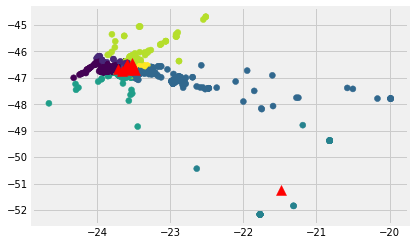

In [56]:
from sklearn.cluster import KMeans
kmeans_scikit = KMeans(n_clusters=10, random_state=0).fit(X)

print("Inércia = ", kmeans_scikit.inertia_)

plt.scatter(X[:,0], X[:,1], c=kmeans_scikit.labels_)
plt.scatter(kmeans_scikit.cluster_centers_[:,0], 
            kmeans_scikit.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

# Pymove Testes

In [34]:
import pymove
from pymove import MoveDataFrame

In [ ]:
move_df = MoveDataFrame(data=all_data, latitude="LATITUDE", longitude="LONGITUDE", datetime="DATAOCORRENCIA", traj_id="NUM_BO")

In [57]:
clusters = pd.DataFrame(kmeans_scikit.cluster_centers_, columns=['lat','lon'])
clusters

,lat,lon
0,-23.710776,-46.675971
1,-23.588791,-46.494471
2,-23.616559,-46.621145
3,-23.474814,-46.707144
4,-21.490331,-51.251889
5,-23.664841,-46.757936
6,-23.543343,-46.643272
7,-23.586146,-46.724773
8,-23.523020,-46.427205
9,-23.507768,-46.567485


In [58]:
from folium import Map
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

pointMap = Map([-23.550, -46.620], zoom_start=10.5, width='100%', height='100%')
pointMap.add_child(FastMarkerCluster(clusters))
pointMap
#pymove.visualization.folium.plot_markers(clusters)
#all_data.to_csv(index=False, doublequote=False, decimal='.',quoting=csv.QUOTE_NONE)

In [53]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5,affinity='euclidean').fit(X[:5000])


In [54]:
uniques, countss = np.unique(clustering.labels_, return_counts=True)
uniques, countss

(array([0, 1, 2, 3, 4]), array([1244,  542, 1535,  916,  763]))

In [55]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=5).fit(X)

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
# kms_per_radian = 6371.0088
# epsilon = 1.5 / kms_per_radian
# db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(dataf))
# cluster_labels = db.labels_
# num_clusters = len(set(cluster_labels))
# clusters = pd.Series([dataf[cluster_labels == n] for n in range(num_clusters)])
# print('Number of clusters: {}'.format(num_clusters))

In [ ]:
# def get_centermost_point(cluster):
#     centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
#     centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
#     return tuple(centermost_point)
# centermost_points = clusters.map(get_centermost_point)

In [ ]:
# lats, lons = zip(*centermost_points)
# rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [ ]:
# rs = rep_points.apply(lambda row: coords[(coords['LATITUDE']==row['lat']) & (coords['LONGITUDE']==row['lon'])].iloc[0], axis=1)

In [ ]:
# fig, ax = plt.subplots(figsize=[10, 6])
# rs_scatter = ax.scatter(rs['LONGITUDE'], rs['LATITUDE'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
# df_scatter = ax.scatter(coords['LONGITUDE'], coords['LATITUDE'], c='k', alpha=0.9, s=3)
# ax.set_title('Full data set vs DBSCAN reduced set')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
# plt.show()